In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [27]:
# !pip install -U ipykernel
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0"
# !pip install autogluon --no-cache-dir
# !pip install -U pandas-profiling
# !pip install -U scikit-learn
from autogluon.tabular import TabularDataset, TabularPredictor
from pandas_profiling import ProfileReport

In [23]:
db = pd.read_csv('diabetes.csv')
db.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

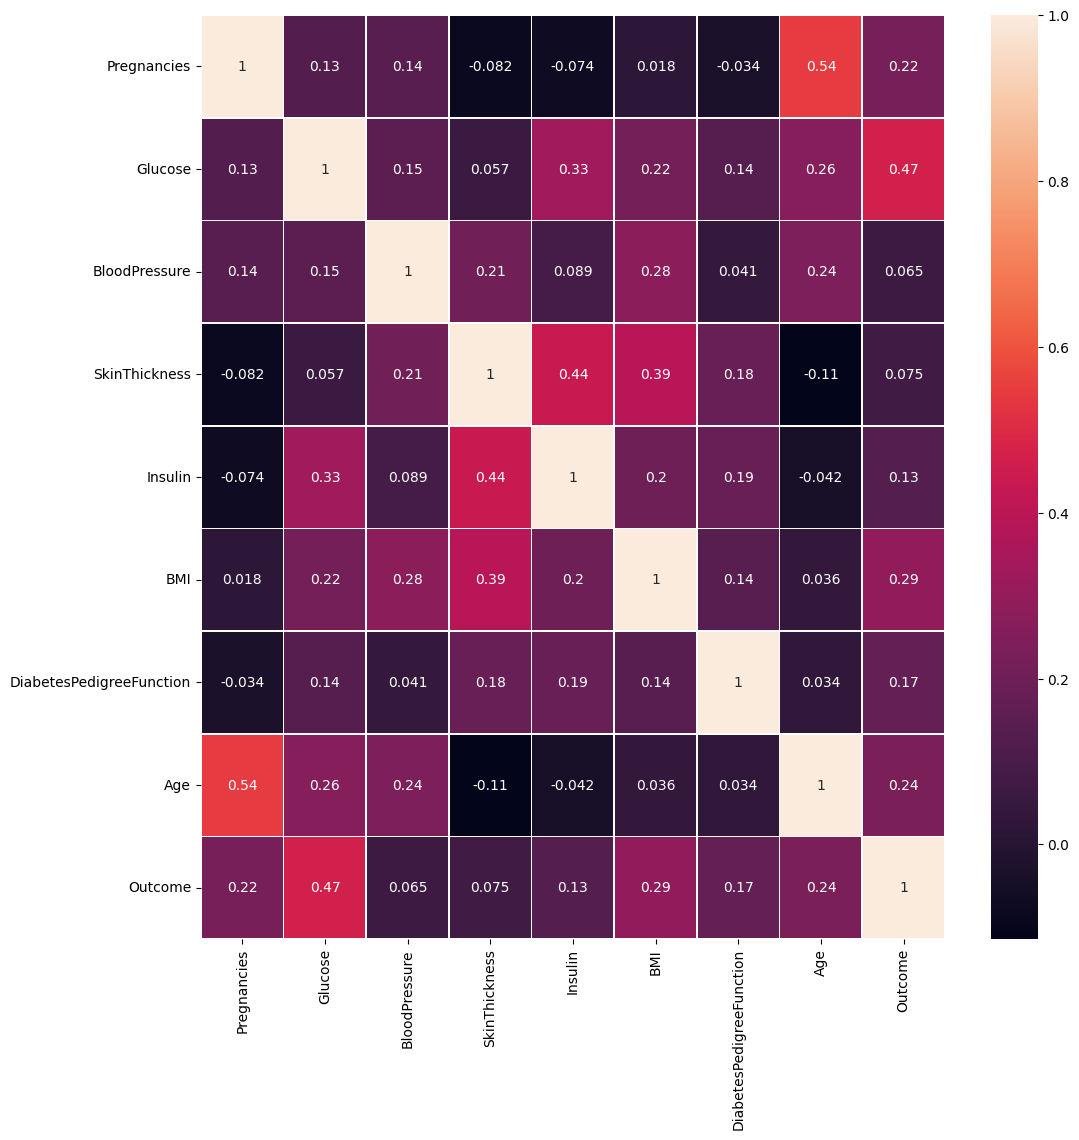

In [36]:
corrMatrix = db.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [17]:
profile = ProfileReport(db, title = 'Diabetes data report')
profile

TypeError: ignored

In [29]:

from sklearn.model_selection import train_test_split
X_entreno, X_prueba = train_test_split(db, test_size=0.2, random_state=0)

In [31]:
predictor = TabularPredictor(label="Outcome", 
                             problem_type = 'regression', 
                             eval_metric = 'r2').fit(train_data = X_entreno, time_limit = 200, presets = "best_quality")

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221007_184245/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 200s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221007_184245/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    614
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 8
INFO:autogluon.tabular.learner.default_learner:Label Column: Outcome
INFO:autogluon.tabular.l

In [32]:
predictor.fit_summary()
# Faltaria hacer la de accuracy

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.317078       0.515970  67.732840                0.000794           0.525032            2       True         12
1          CatBoost_BAG_L1   0.296548       0.029220  12.195631                0.029220          12.195631            1       True          6
2   NeuralNetFastAI_BAG_L1   0.272706       0.108236  19.160131                0.108236          19.160131            1       True          8
3     ExtraTreesMSE_BAG_L1   0.271644       0.104215   0.620563                0.104215           0.620563            1       True          7
4   RandomForestMSE_BAG_L1   0.269134       0.196291   1.175842                0.196291           1.175842            1       True          5
5        LightGBMXT_BAG_L1   0.265782       0.043478  18.464934                0.04347

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.11208132751746736,
  'KNeighborsDist_BAG_L1': 0.11354951512807254,
  'LightGBMXT_BAG_L1': 0.2657824227364084,
  'LightGBM_BAG_L1': 0.2433987331868681,
  'RandomForestMSE_BAG_L1': 0.26913391906468387,
  'CatBoost_BAG_L1': 0.29654779975887546,
  'ExtraTreesMSE_BAG_L1